In [1]:
from pool import AMMPool, AMMPoolHistory, CPMM

In [2]:
import pandas as pd 

**Define Pools to study and initialize**

In [3]:
# Define token0=USDC and token1=WETH
token0 = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
token1 = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'

**Get Uni trades stream**  

In [4]:
from datastreams.datastream import Streamer

query_size = 10000

# instantiate Streamer object. 
# Note - unlike the cow queries, univ3 does not require multiple streamer instantations because the swaps field path is reset each iteration. 
# If the Cow queries were updated to use the same method, we could use the same streamer object for all queries.
univ3_ds = Streamer('https://api.thegraph.com/subgraphs/name/messari/uniswap-v3-ethereum')

# get a query field path from the query dictionary which is automatically populated in the Streamer object
uni_swaps_fp = univ3_ds.queryDict.get('swaps')

# define query path and parameters 
uni_swaps_qp = uni_swaps_fp(
        first=query_size, 
        orderBy='timestamp',
        orderDirection='asc',
        where = {'timestamp_gt':1643673600, 'pool': '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8'} 
        )

# run query
uni_swaps_df = univ3_ds.runQuery(uni_swaps_qp)

FIELD - swaps


In [5]:
uni_swaps_df.shape

(10000, 20)

In [6]:
uni_swaps_df.dtypes

swaps_id               object
swaps_hash             object
swaps_nonce             int64
swaps_logIndex          int64
swaps_gasLimit          int64
swaps_gasUsed          object
swaps_gasPrice          int64
swaps_protocol_id      object
swaps_account_id       object
swaps_pool_id          object
swaps_blockNumber       int64
swaps_timestamp         int64
swaps_tick              int64
swaps_tokenIn_id       object
swaps_amountIn         object
swaps_amountInUSD     float64
swaps_tokenOut_id      object
swaps_amountOut        object
swaps_amountOutUSD    float64
endpoint               object
dtype: object

In [7]:
uni_swaps_df.head(5)

,swaps_id,swaps_hash,swaps_nonce,swaps_logIndex,swaps_gasLimit,swaps_gasUsed,swaps_gasPrice,swaps_protocol_id,swaps_account_id,swaps_pool_id,swaps_blockNumber,swaps_timestamp,swaps_tick,swaps_tokenIn_id,swaps_amountIn,swaps_amountInUSD,swaps_tokenOut_id,swaps_amountOut,swaps_amountOutUSD,endpoint
0,0xc500098c60135dfa8c5aded8a9ffddf95d0422993007...,0xc500098c60135dfa8c5aded8a9ffddf95d0422993007...,7236,66,1200000,None,243310839517,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x60b86af869f23aeb552fb7f3cabd11b829f6ab2f,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116768,1643673723,197369,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,127681606843910411476,343127.995251,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,341883139095,341883.139095,uniswap-v3-ethereum
1,0x61b6e708eae24a14f75614fed90d53343a08d844789f...,0x61b6e708eae24a14f75614fed90d53343a08d844789f...,34,239,630062,None,139345402218,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xb6398fad2f8d238afd3a522a8ceafd400e71ef62,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116795,1643673948,197369,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,1097382974817921891,2945.362647,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2936510663,2936.510663,uniswap-v3-ethereum
2,0x78cf3e16e65e25d456192ad57c1bb665534fe7c38cc3...,0x78cf3e16e65e25d456192ad57c1bb665534fe7c38cc3...,8187,147,380178,None,171184009666,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x30d6c6419cff37c41d93605b2d4d3c79329dc5b3,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116802,1643674049,197352,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,457538400000,457538.400000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,169817246222135447688,455782.502709,uniswap-v3-ethereum
3,0xfeab49f705dfe5667373cedeb8af0b4608547131b98e...,0xfeab49f705dfe5667373cedeb8af0b4608547131b98e...,2505,49,380178,None,195208384468,0x1f98431c8ad98523631ae4a59f267346ea31f984,0x316c8fa8607ba1be5eb12c2c02b811b48c86778e,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116806,1643674124,197341,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,304930800000,304930.800000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,113017931108396951560,303845.861151,uniswap-v3-ethereum
4,0xb2daa53ef2e9329bb47bd8f56f04c7a8fb87d92d8398...,0xb2daa53ef2e9329bb47bd8f56f04c7a8fb87d92d8398...,11433,115,1200000,None,176045958490,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xd006ad343886254359dc87aa5e1753446072fd50,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,14116808,1643674146,197297,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,762505891677,762505.891677,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,281845732056918124330,758584.016556,uniswap-v3-ethereum


In [8]:
# Find the first and last value in the timestamp column
first_timestamp_uni = uni_swaps_df['swaps_timestamp'].min()
last_timestamp_uni = uni_swaps_df['swaps_timestamp'].max()

In [9]:
first_timestamp_uni

1643673723

In [10]:
last_timestamp_uni

1645732238

**get chainlink pricing to value pools**

In [11]:
# load streamer class
chain_ds = Streamer('https://api.thegraph.com/subgraphs/name/openpredict/chainlink-prices-subgraph')

In [12]:
chain_price_feed = "ETH/USD"

In [13]:
chain_dfs_list = []

In [14]:
# get a query field path from the query dictionary which is automatically populated in the Streamer object
chain_fp = chain_ds.queryDict.get('prices')

# add parameters to the settlements_qp.
chain_qp = chain_fp(
    first= 10000,
    orderBy='timestamp',
    orderDirection='asc',
    where = {'timestamp_gt':1643673600, 'assetPair': chain_price_feed}
    )

# run query
chain_df = chain_ds.runQuery(chain_qp)

FIELD - prices


In [15]:
# drop prices_id, endpoint. 
chain_df = chain_df.drop(['prices_id', 'endpoint'], axis=1)
# divide prices_price by 1e8 to get the price in USD
chain_df['prices_price'] = chain_df['prices_price'] / 10 ** 8

In [16]:
chain_df.shape

(10000, 3)

In [17]:
chain_df.head(5)

,prices_assetPair_id,prices_timestamp,prices_price
0,ETH/USD,1643676926,2691.315867
1,ETH/USD,1643680542,2686.346068
2,ETH/USD,1643683201,2700.412022
3,ETH/USD,1643684135,2711.714351
4,ETH/USD,1643685147,2731.076527


In [18]:
print(chain_df.columns) 

Index(['prices_assetPair_id', 'prices_timestamp', 'prices_price'], dtype='object')


In [19]:
# Find the first and last value in the timestamp column
first_timestamp = chain_df['prices_timestamp'].min()
last_timestamp = chain_df['prices_timestamp'].max()

In [20]:
first_timestamp

1643676926

In [21]:
last_timestamp

1657307781

In [22]:
timestamps = pd.DataFrame({'prices_timestamp': range(first_timestamp, last_timestamp + 1)})

In [23]:
timestamps.shape

(13630856, 1)

In [24]:
chain_df = pd.merge(timestamps, chain_df, on='prices_timestamp', how='left')

In [25]:
chain_df.head(5)

,prices_timestamp,prices_assetPair_id,prices_price
0,1643676926,ETH/USD,2691.315867
1,1643676927,NaN,NaN
2,1643676928,NaN,NaN
3,1643676929,NaN,NaN
4,1643676930,NaN,NaN


In [26]:
# Forward-fill missing values
chain_df.fillna(method='ffill', inplace=True)

In [27]:
chain_df.shape

(13630856, 3)

In [28]:
chain_df

,prices_timestamp,prices_assetPair_id,prices_price
0,1643676926,ETH/USD,2691.315867
1,1643676927,ETH/USD,2691.315867
2,1643676928,ETH/USD,2691.315867
3,1643676929,ETH/USD,2691.315867
4,1643676930,ETH/USD,2691.315867
...,...,...,...
13630851,1657307777,ETH/USD,1222.793400
13630852,1657307778,ETH/USD,1222.793400
13630853,1657307779,ETH/USD,1222.793400
13630854,1657307780,ETH/USD,1222.793400


**get initialization price**

In [29]:
first_timestamp_uni

1643673723

In [30]:
# chainlink at first_timestamp of uni trades:
initialization_df = chain_df[chain_df["prices_timestamp"] == last_timestamp]
initialization_df

,prices_timestamp,prices_assetPair_id,prices_price
13630855,1657307781,ETH/USD,1229.09116


In [31]:
initilizatioin_price = initialization_df.iloc[0,2]
initilizatioin_price

1229.09115983

In [32]:
USDC_reserves_USD = 10000000000


token0_start = USDC_reserves_USD*10**6
token0_start

10000000000000000

In [33]:
token1_start = (USDC_reserves_USD/initilizatioin_price)*(10**18)
token1_start

8.13609301476315e+24

**1.Simple AMM. SWAP ALL** 

In [34]:
# Create an instance of AMMPoolHistory 
feedlot1 = AMMPoolHistory(token0_start, token1_start)

In [35]:
# Instantiate the CPMM object with the AMMPool object
cpmm = CPMM(pool=feedlot1)

In [36]:
# Iterate through the rows of the dataframe
for index, row in uni_swaps_df.iterrows():
    # Determine if the swap is a buy or a sell
    token_in = row['swaps_tokenIn_id']
    token_out = row['swaps_tokenOut_id']
    is_buy = token_in == token0 and token_out == token1
    amt = row['swaps_amountIn']
    
    # Extract the amountIn, amountOut, and timestamp
    if is_buy:
        token = 0
    else:
        token = 1 
    ts = row['swaps_timestamp']
    
    # Run the swap function on the AMM pool
    cpmm.market_order_sell(amt,token,ts)

In [37]:
results1 = pd.DataFrame(feedlot1.history)

In [38]:
results1.shape

(10001, 3)

In [39]:
results1.head(5)

,ts,reserve0,reserve1
0,0,10000000000000000,8.136093e+24
1,1643673723,9999843070128492,8.136221e+24
2,1643673948,9999841721387294,8.136222e+24
3,1643674049,10000299259787294,8.135850e+24
4,1643674124,10000604190587294,8.135601e+24


In [40]:
merged1_df = pd.merge(results1, chain_df, left_on='ts', right_on='prices_timestamp')
merged1_df.rename(columns={'prices_price': 'chainlink_price'}, inplace=True)

In [41]:
merged1_df

,ts,reserve0,reserve1,prices_timestamp,prices_assetPair_id,chainlink_price
0,1643677266,10001000787847905,8.135279e+24,1643677266,ETH/USD,2691.315867
1,1643677640,10001250543085952,8.135076e+24,1643677640,ETH/USD,2691.315867
2,1643677829,10001375543085952,8.134974e+24,1643677829,ETH/USD,2691.315867
3,1643677886,10001369418331458,8.134979e+24,1643677886,ETH/USD,2691.315867
4,1643678003,10001360389408058,8.134986e+24,1643678003,ETH/USD,2691.315867
...,...,...,...,...,...,...
9986,1645731605,10552574488556650,7.710055e+24,1645731605,ETH/USD,2554.168141
9987,1645731622,10552686988556650,7.709973e+24,1645731622,ETH/USD,2554.168141
9988,1645732198,10552786955305530,7.709900e+24,1645732198,ETH/USD,2567.478087
9989,1645732198,10552830273358636,7.709868e+24,1645732198,ETH/USD,2567.478087


In [42]:
merged1_df['value'] = (merged1_df['reserve1']*merged1_df['chainlink_price']/(10**18)) + merged1_df['reserve0']/(10**18)

In [43]:
merged1_df

,ts,reserve0,reserve1,prices_timestamp,prices_assetPair_id,chainlink_price,value
0,1643677266,10001000787847905,8.135279e+24,1643677266,ETH/USD,2691.315867,2.189461e+10
1,1643677640,10001250543085952,8.135076e+24,1643677640,ETH/USD,2691.315867,2.189406e+10
2,1643677829,10001375543085952,8.134974e+24,1643677829,ETH/USD,2691.315867,2.189378e+10
3,1643677886,10001369418331458,8.134979e+24,1643677886,ETH/USD,2691.315867,2.189380e+10
4,1643678003,10001360389408058,8.134986e+24,1643678003,ETH/USD,2691.315867,2.189382e+10
...,...,...,...,...,...,...,...
9986,1645731605,10552574488556650,7.710055e+24,1645731605,ETH/USD,2554.168141,1.969278e+10
9987,1645731622,10552686988556650,7.709973e+24,1645731622,ETH/USD,2554.168141,1.969257e+10
9988,1645732198,10552786955305530,7.709900e+24,1645732198,ETH/USD,2567.478087,1.979500e+10
9989,1645732198,10552830273358636,7.709868e+24,1645732198,ETH/USD,2567.478087,1.979492e+10


In [44]:
merged1_df.isna().sum()

ts                     0
reserve0               0
reserve1               0
prices_timestamp       0
prices_assetPair_id    0
chainlink_price        0
value                  0
dtype: int64

Text(0, 0.5, 'Value')

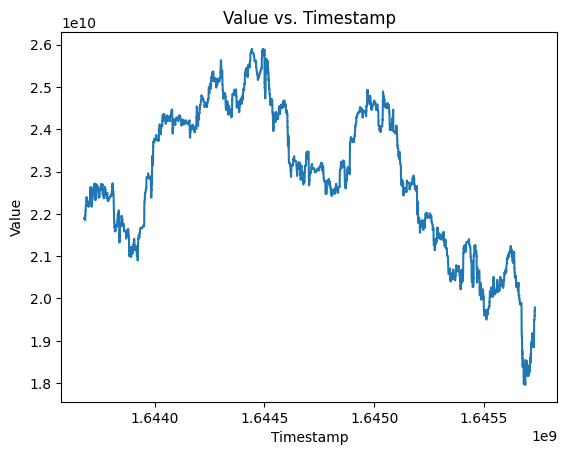

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['value'])
ax.set_title('Value vs. Timestamp')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)


Text(0, 0.5, 'Value')

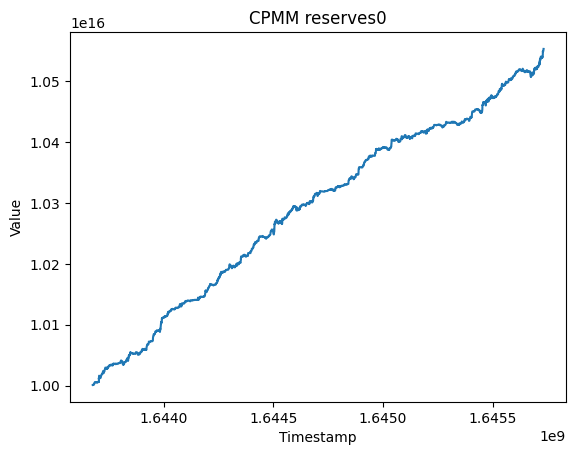

In [46]:
fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['reserve0'])
ax.set_title('CPMM reserves0')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

Text(0, 0.5, 'Value')

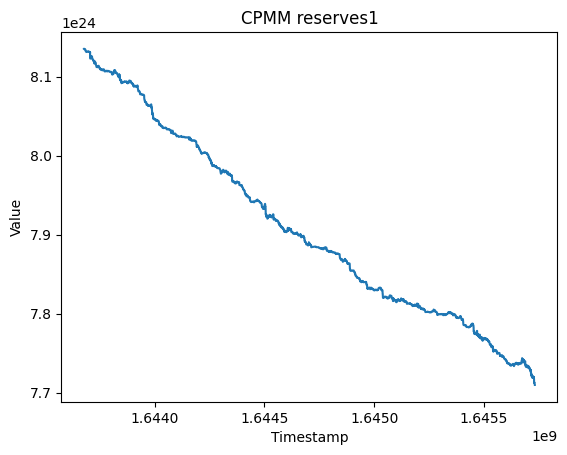

In [47]:
fig, ax = plt.subplots()
ax.plot(merged1_df['ts'], merged1_df['reserve1'])
ax.set_title('CPMM reserves1')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

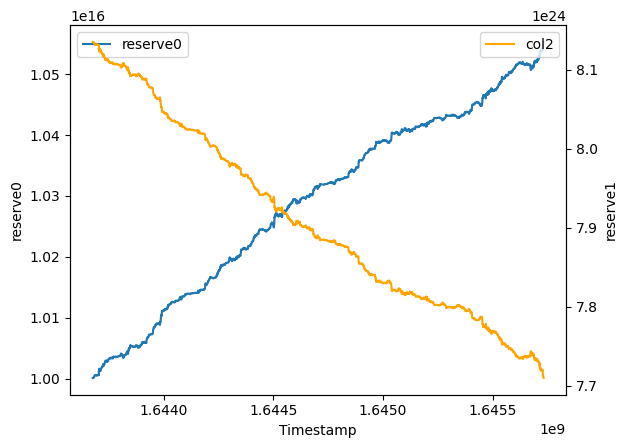

In [48]:
import matplotlib.pyplot as plt

# Assume that df is your dataframe with three columns: time, col1, and col2

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot col1 on the first y-axis
ax.plot(merged1_df["ts"], merged1_df["reserve0"], label="reserve0")

# Create a second y-axis on the right-hand side
ax2 = ax.twinx()

# Plot col2 on the second y-axis
ax2.plot(merged1_df["ts"], merged1_df["reserve1"], color="orange", label="col2")

# Add legends and axis labels
ax.set_xlabel("Timestamp")
ax.set_ylabel("reserve0")
ax2.set_ylabel("reserve1")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()


**OraclePool AMM**

**get cow trades for oracle pricing** 

In [49]:
cow_ds = Streamer('https://api.thegraph.com/subgraphs/name/cowprotocol/cow')

# get COW trades 

trades_fp = cow_ds.queryDict.get('trades')

# trades query path that gets token a -> token b trades
trades_qp = trades_fp(
    first=10000,
    orderBy='timestamp',
    orderDirection='asc',
    where={'timestamp_gt':1643673600, 'sellToken':'0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
           'buyToken':'0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
    }
)

# run query
trades_df = cow_ds.runQuery(trades_qp)

FIELD - trades


In [50]:
trades_df.shape

(6701, 16)

In [51]:
trades_df.head(5)

,trades_id,trades_timestamp,trades_gasPrice,trades_feeAmount,trades_txHash,trades_settlement_id,trades_buyAmount,trades_sellAmount,trades_sellToken_id,trades_buyToken_id,trades_order_id,trades_buyAmountEth,trades_sellAmountEth,trades_buyAmountUsd,trades_sellAmountUsd,endpoint
0,0xc8379eed6c50d2133f96a4e98d7629f767ad5c94fcde...,1643677243,131486015070,33214319,0x94ea5a6b74dfd23f254e178935edf31fc8bed500617f...,0x94ea5a6b74dfd23f254e178935edf31fc8bed500617f...,80383518062240036,250000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc8379eed6c50d2133f96a4e98d7629f767ad5c94fcde...,0.080384,0.092918,216.274782,250.000000,cow
1,0x9dde9bf9a979a92af1aaf08d91c4ccf790e118380137...,1643692256,123311573622,47093955,0xb9fcc63c5c1b83b6e41999d41282e0f7dbf69c4a87cb...,0xb9fcc63c5c1b83b6e41999d41282e0f7dbf69c4a87cb...,1804107117913519403,5000000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x9dde9bf9a979a92af1aaf08d91c4ccf790e118380137...,1.804107,1.820594,4954.722065,5000.000000,cow
2,0x5a0ed80df1146b858c67a3fd08b8cf42134e7127c050...,1643699916,120586162991,39652676,0xc31eff40ad783a1c282a85bc4f0e5134d35c21992444...,0xc31eff40ad783a1c282a85bc4f0e5134d35c21992444...,722840370145690884,2024247611,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5a0ed80df1146b858c67a3fd08b8cf42134e7127c050...,0.722840,0.739258,1979.293174,2024.247611,cow
3,0x10fc01b7ea9886bd60947b635f9f975b88c04456bafc...,1643705065,80841326676,37470274,0xebd4a7bc782f952e674ea22f30178f1b8adfe8ec3e83...,0xebd4a7bc782f952e674ea22f30178f1b8adfe8ec3e83...,38851505045821867232,106794792848,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x10fc01b7ea9886bd60947b635f9f975b88c04456bafc...,38.851505,38.856221,106781.831208,106794.792848,cow
4,0x9099795d05dcc1a02c7dca08414e4105df88f8348658...,1643709518,106782879992,44653587,0xb9bb56b417504f26cedc21dcbd3f3dc996b81ab82ac0...,0xb9bb56b417504f26cedc21dcbd3f3dc996b81ab82ac0...,25000000000000000000,68391886148,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x9099795d05dcc1a02c7dca08414e4105df88f8348658...,25.000000,24.969040,68476.687172,68391.886148,cow


In [52]:
# Set query size large enough to retrieve all tokens in the graph
query_size = 10000

token_fp = cow_ds.queryDict.get('tokens')

# add parameters to the settlements_qp.
token_qp = token_fp(
    first=query_size,
)

# run query
token_df = cow_ds.runQuery(token_qp)


FIELD - tokens


In [53]:
token_df.shape

(2967, 13)

In [54]:
# Merge1 on sell token address.  x = sell token 

merged_df = pd.merge(trades_df, token_df, left_on='trades_sellToken_id', right_on='tokens_address')

merged_df.shape

(6701, 29)

In [55]:
# Merge2 on buy token address.  y = buy token 
cow_df = pd.merge(merged_df, token_df, left_on='trades_buyToken_id', right_on='tokens_address')

cow_df.shape

(6701, 42)

In [56]:
cow_df.dtypes

trades_id                        object
trades_timestamp                  int64
trades_gasPrice                   int64
trades_feeAmount                  int64
trades_txHash                    object
trades_settlement_id             object
trades_buyAmount                 object
trades_sellAmount                 int64
trades_sellToken_id              object
trades_buyToken_id               object
trades_order_id                  object
trades_buyAmountEth             float64
trades_sellAmountEth            float64
trades_buyAmountUsd             float64
trades_sellAmountUsd            float64
endpoint_x                       object
tokens_id_x                      object
tokens_address_x                 object
tokens_firstTradeTimestamp_x      int64
tokens_name_x                    object
tokens_symbol_x                  object
tokens_decimals_x                 int64
tokens_totalVolume_x             object
tokens_priceEth_x               float64
tokens_priceUsd_x               float64


In [57]:
# calculate buy and sell amounts from the correct decimal 
cow_df['sell_amount'] = cow_df.apply(lambda x: x['trades_sellAmount'] / (10**x['tokens_decimals_x']), axis=1)
cow_df['buy_amount'] = cow_df.apply(lambda x: x['trades_buyAmount'] / (10**x['tokens_decimals_y']), axis=1)

In [58]:
# calculate COW price defined sell amount / buy amount
cow_df['cow_price'] = cow_df['sell_amount'] / cow_df['buy_amount']

In [59]:
cow_df

,trades_id,trades_timestamp,trades_gasPrice,trades_feeAmount,trades_txHash,trades_settlement_id,trades_buyAmount,trades_sellAmount,trades_sellToken_id,trades_buyToken_id,...,tokens_totalVolume_y,tokens_priceEth_y,tokens_priceUsd_y,tokens_numberOfTrades_y,tokens_totalVolumeUsd_y,tokens_totalVolumeEth_y,endpoint,sell_amount,buy_amount,cow_price
0,0xc8379eed6c50d2133f96a4e98d7629f767ad5c94fcde...,1643677243,131486015070,33214319,0x94ea5a6b74dfd23f254e178935edf31fc8bed500617f...,0x94ea5a6b74dfd23f254e178935edf31fc8bed500617f...,80383518062240036,250000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,250.000000,0.080384,3110.090302
1,0x9dde9bf9a979a92af1aaf08d91c4ccf790e118380137...,1643692256,123311573622,47093955,0xb9fcc63c5c1b83b6e41999d41282e0f7dbf69c4a87cb...,0xb9fcc63c5c1b83b6e41999d41282e0f7dbf69c4a87cb...,1804107117913519403,5000000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,5000.000000,1.804107,2771.454062
2,0x5a0ed80df1146b858c67a3fd08b8cf42134e7127c050...,1643699916,120586162991,39652676,0xc31eff40ad783a1c282a85bc4f0e5134d35c21992444...,0xc31eff40ad783a1c282a85bc4f0e5134d35c21992444...,722840370145690884,2024247611,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,2024.247611,0.722840,2800.407524
3,0x10fc01b7ea9886bd60947b635f9f975b88c04456bafc...,1643705065,80841326676,37470274,0xebd4a7bc782f952e674ea22f30178f1b8adfe8ec3e83...,0xebd4a7bc782f952e674ea22f30178f1b8adfe8ec3e83...,38851505045821867232,106794792848,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,106794.792848,38.851505,2748.794229
4,0x9099795d05dcc1a02c7dca08414e4105df88f8348658...,1643709518,106782879992,44653587,0xb9bb56b417504f26cedc21dcbd3f3dc996b81ab82ac0...,0xb9bb56b417504f26cedc21dcbd3f3dc996b81ab82ac0...,25000000000000000000,68391886148,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,68391.886148,25.000000,2735.675446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6696,0x1226f9288a38c19eb74ac59b79ccc1e7e9e148e606ed...,1678670591,27119723418,21468635,0x8a2e774451daaa6c924890242ff2e084ea4311f9c571...,0x8a2e774451daaa6c924890242ff2e084ea4311f9c571...,33780526034023434317,55000000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,55000.000000,33.780526,1628.157002
6697,0x1a9f11a24418b0ff085a539252a32e2f6d587150c8b0...,1678681475,18427390696,5858603,0x4cac9f1967260d2efae84ff46e23dc30f4060cb8071a...,0x4cac9f1967260d2efae84ff46e23dc30f4060cb8071a...,30887883850907572080,49990000000,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,49990.000000,30.887884,1618.433954
6698,0x3c1af6d11354c31d3fff81a3aa9c34b95e2b5ed73da1...,1678684919,18732868139,6083833,0xf68f96e4cb64ddb43e9b4d961a821f5351620f522281...,0xf68f96e4cb64ddb43e9b4d961a821f5351620f522281...,6106811608807937047,9877211648,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,...,2429519190420623147140215,1.0,1609.599476,133537,4.940117e+09,2.429519e+06,cow,9877.211648,6.106812,1617.408933
6699,0x932980cf1fc5b9f31091b50653dedcf16c4fc25a285f...,1678685219,17167764983,10095658,0x3cc34059f6a29d883e75aaae92f9074b541997709e50...,0x3cc34059f6a29d883e75aaae92f9074b541997709e50...,11000000000000000000

In [60]:
# Find the first and last value in the timestamp column
first_timestamp_cow = chain_df['prices_timestamp'].min()
last_timestamp_cow = chain_df['prices_timestamp'].max()

In [61]:
first_timestamp_cow

1643676926

In [62]:
last_timestamp_cow

1657307781

In [63]:
oracle_dict = [{"ts": row["trades_timestamp"], "p": row["cow_price"]} for _, row in cow_df.iterrows()]

In [64]:
oracle_dict

[{'ts': 1643677243, 'p': 3110.090302422791},
 {'ts': 1643692256, 'p': 2771.454061875542},
 {'ts': 1643699916, 'p': 2800.407523713716},
 {'ts': 1643705065, 'p': 2748.794228744681},
 {'ts': 1643709518, 'p': 2735.67544592},
 {'ts': 1643719073, 'p': 2798.445017452465},
 {'ts': 1643741878, 'p': 2795.3195531193237},
 {'ts': 1643746869, 'p': 2902.370924285014},
 {'ts': 1643770664, 'p': 2819.0739397945267},
 {'ts': 1643770770, 'p': 2794.518177673636},
 {'ts': 1643770839, 'p': 2805.9724170016357},
 {'ts': 1643781424, 'p': 2845.879938128389},
 {'ts': 1643781424, 'p': 2845.879938128389},
 {'ts': 1643792394, 'p': 2890.1357709011513},
 {'ts': 1643792769, 'p': 2793.73025544737},
 {'ts': 1643793030, 'p': 2838.656661473755},
 {'ts': 1643799378, 'p': 2784.1677624189447},
 {'ts': 1643869843, 'p': 4064.8550609835634},
 {'ts': 1643893265, 'p': 2621.96526413889},
 {'ts': 1643893364, 'p': 2639.3513678048616},
 {'ts': 1643893964, 'p': 2620.348994994899},
 {'ts': 1643897589, 'p': 2613.541248242574},
 {'ts': 1

**Oracle pool simulation**

In [65]:
from pool import CPMM, AMMPool, SwapRejectedError, OraclePool

In [66]:
# Create an instance of AMMPoolHistory 
feedlot2 = AMMPoolHistory(token0_start, token1_start)

In [67]:
feedlot3 = OraclePool(feedlot2, oracle_dict)

In [75]:
 # Iterate through the rows of the dataframe
for index, row in uni_swaps_df.iterrows():
    # Determine if the swap is a buy or a sell
    token_in = row['swaps_tokenIn_id']
    token_out = row['swaps_tokenOut_id']
    is_buy = token_in == token0 and token_out == token1
    amt = row['swaps_amountIn']
    
    # Extract the amountIn, amountOut, and timestamp
    if is_buy:
        token = 0
    else:
        token = 1 
    ts = row['swaps_timestamp']
    
    print('token', token)
    print('amt', amt)
    print('amt',amt/10**18)
    print('token_in', token_in)
    print('ts', ts)
    
    # Run the swap function on the AMM pool
    feedlot3.market_order_sell(amt,token,ts)

token 1
amt 127681606843910411476
amt 127.68160684391042
token_in 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
ts 1643673723


ReserveDepletedError: Reserve 0 depleted!

In [69]:
results2 = pd.DataFrame(feedlot2.history)

In [70]:
results2.shape

(1, 3)

In [71]:
results2.head(5)

,ts,reserve0,reserve1
0,0,10000000000000000,8.136093e+24


In [72]:
merged2_df = pd.merge(results2, chain_df, left_on='ts', right_on='prices_timestamp')
merged2_df.rename(columns={'prices_price': 'chainlink_price'}, inplace=True)

In [ ]:
merged2_df['value'] = merged2_df['reserve1']*merged2_df['chainlink_price']/10**18 + merged2_df['reserve0']/10**18

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(merged2_df['ts'], merged2_df['value'])
ax.set_title('Value vs. Timestamp')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Value')
#fig.savefig('value_vs_timestamp.png', dpi=300)

In [ ]:
# Assume that df is your dataframe with three columns: time, col1, and col2

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot col1 on the first y-axis
ax.plot(merged2_df["ts"], merged2_df["reserve0"], label="reserve0")

# Create a second y-axis on the right-hand side
ax2 = ax.twinx()

# Plot col2 on the second y-axis
ax2.plot(merged2_df["ts"], merged2_df["reserve1"], color="orange", label="reserves1")

# Add legends and axis labels
ax.set_xlabel("Timestamp")
ax.set_ylabel("reserve0")
ax2.set_ylabel("reserve1")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()